### <font color = blue>The objective is to predict if a patient would receive a metastatic cancer diagnosis within 90 days of screening</f>

# Perform Exploratory Data Analysis (EDA)

# 0. Notebook setup

### Install & import required libraries

In [1]:
# We only need to run pip install if a library has never been installed. Therefore, it's a one-time task. 
# Once a library is installed, this step is skipped, and we just need to import each library in 
# every new instance of a Python session.

!pip install pandas
!pip install numpy
!pip install sweetviz
!pip install seaborn
!pip install metplotlib
!pip install factor-analyzer 

ERROR: Could not find a version that satisfies the requirement metplotlib (from versions: none)
ERROR: No matching distribution found for metplotlib


In [2]:
import pandas as pd
import numpy as np
import sweetviz as sv
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

from factor_analyzer.factor_analyzer import FactorAnalyzer 

### Set up display option so output won't be truncated

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# 1. Read in data


In [4]:
# Read the data file from the local drive and save as a dataframe, which is named df_temp here. 
# Replace the portion within the ' ' with your path and file name.

df_temp = pd.read_csv(r'/Users/lorettachan/Documents/Wids_ContentDevelopment/Data/Training_Use.csv')

In [5]:
# Take a look at the first 50 records;  to see the last 50 records use '.tail(50)'; 
# change the number in () to get a different number of records;
# the default df.head() will show the first 5 records

df_temp.head(50)

,patient_id,DiagPeriodL90D,patient_age,education_bachelors,income_individual_median,home_value,commute_time,health_uninsured,widowed,education_less_highschool,patient_race,patient_state,Region,bmi,breast_cancer_diagnosis_code,metastatic_cancer_diagnosis_code,payer_type,race_white,race_black,race_asian,race_native,hispanic,labor_force_participation,rent_median,self_employed,poverty,limited_english,Ozone,unemployment_rate,home_ownership
0,475714,1,84,8.357143,24563.57143,2.646343e+05,27.814286,11.200000,4.442857,33.257143,NaN,CA,West,NaN,C50919,C7989,MEDICAID,44.100000,13.100000,5.100000,1.485714,66.685714,61.528571,1165.000000,13.428571,22.542857,10.100000,52.237210,8.471429,44.585714
1,349367,1,62,23.739394,41287.27273,6.776885e+05,30.606061,7.018182,4.651515,14.230303,White,CA,West,28.49,C50411,C773,COMMERCIAL,54.030303,2.527273,20.827273,0.587879,37.948485,65.230303,2003.125000,15.224242,10.109091,8.057576,42.301121,5.103030,61.463636
2,138632,1,43,19.678333,40399.03333,2.377131e+05,31.394915,15.066667,4.710000,10.811667,White,TX,South,38.09,C50112,C773,COMMERCIAL,75.820000,9.231667,3.618333,0.463333,19.370000,66.428333,1235.907407,13.722034,9.663333,3.356667,40.108207,4.560000,72.745000
3,617843,0,45,33.285714,55336.28571,1.012474e+06,27.561905,4.404762,4.623810,5.835714,White,CA,West,NaN,C50212,C773,COMMERCIAL,65.014286,1.438095,18.845238,0.430952,16.716667,64.430952,2354.738095,18.502381,8.688095,5.280952,42.070075,5.264286,59.221429
4,817482,0,55,13.978000,29073.18367,2.498457e+05,26.170213,12.088000,5.406000,11.576000,NaN,ID,West,NaN,1749,C773,COMMERCIAL,86.712000,0.426000,0.656000,0.760000,13.334000,57.488000,919.743590,13.029545,11.224000,1.946000,41.356058,4.258000,77.098000
5,111545,0,66,15.874286,35780.84375,1.504388e+05,25.000000,4.797143,6.091429,8.300000,White,NY,Northeast,NaN,1749,C7981,MEDICARE ADVANTAGE,93.528571,1.031429,0.422857,0.742857,2.465714,60.934286,794.625000,7.070968,8.888235,0.638235,40.107248,3.882857,83.873529
6,914071,1,51,23.886154,36053.40000,8.737560e+05,30.709375,10.341538,4.766154,22.915385,NaN,CA,West,29.05,C50912,C779,COMMERCIAL,42.824615,12.216923,12.703077,1.120000,45.526154,64.387692,1651.145161,21.233333,20.760000,14.737500,41.186992,8.683077,31.504687
7,479368,1,60,12.003333,32379.13333,9.701639e+04,24.275862,8.753333,6.943333,9.813333,White,IL,Midwest,NaN,C50512,C773,COMMERCIAL,96.406667,0.723333,0.400000,0.146667,2.723333,61.740000,711.259259,12.253846,10.890000,0.503333,37.646770,5.776667,78.866667
8,994014,0,82,15.863077,30761.81034,3.061144e+05,26.015254,6.645313,5.561538,9.570769,White,NaN,NaN,NaN,1744,C7800,MEDICARE ADVANTAGE,84.570769,0.509231,1.835385,2.189231,10.621538,51.718462,1061.215686,10.368966,14.593651,1.620968,36.323573,7.703279,70.209677
9,155485,1,64,19.143396,38353.98077,1.476496e+05,23.843396,4.684906,6.247170,5.084906,NaN,IL,Midwest,NaN,C50912,C773,COMMERCIAL,93.201887,1.549057,0.716981,0.092453,3.041509,64.432075,823.416667,13.631373,8.443396,0.190566,37.773830,3.666038,81.622642


In [6]:
# .info() provides info, such as number of non-nulls and datatype on each column in the dataframe

df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12906 entries, 0 to 12905
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   patient_id                        12906 non-null  int64  
 1   DiagPeriodL90D                    12906 non-null  int64  
 2   patient_age                       12906 non-null  int64  
 3   education_bachelors               12905 non-null  float64
 4   income_individual_median          12905 non-null  float64
 5   home_value                        12902 non-null  float64
 6   commute_time                      12905 non-null  float64
 7   health_uninsured                  12905 non-null  float64
 8   widowed                           12905 non-null  float64
 9   education_less_highschool         12905 non-null  float64
 10  patient_race                      6521 non-null   object 
 11  patient_state                     12855 non-null  object 
 12  Regi

# 2. Exporatory data analysis (EDA)

<font color = blue>Previously in GoogleSheet, we looked at each column on its own (i.e. Univariate analysis), and next, we'll be looking at pairs of columns at a time (bivariate analysis).</blue>

## A. Crosstabulation Table

When looking at payer_type from df_temp.info() or the count below, there is quite a number of empty cells (12906 - 11103 = 1803).

In [7]:
df_temp.payer_type.value_counts(dropna = False)

COMMERCIAL            6032
MEDICAID              2569
MEDICARE ADVANTAGE    2502
NaN                   1803
Name: payer_type, dtype: int64

In [8]:
df_temp['payer_type'].isnull().sum()

1803

<font color = blue>
- Do you think payer_type is an important column? Why or why not?
<br>
- How would you plan to explore it further?
<br>Ans. The column payor_type indicates who is paying for the patients' medical bills. Therefore, it might be a helpful column.  One thing we can check is to generate some crosstabulation tables to see if there is any noticeable pattern, such as where the NaN's congregate.  For instance, we can take a look at crosstabbing payer_type with patient_state.
</font>

To Instructor: From this point on, there are multiple command cells below for generating crosstab on different columns. The student version only shows payer_type.

In [9]:
pd.crosstab(df_temp['patient_state'].fillna('MISSING'),df_temp['payer_type'].fillna('MISSING'),margins=True)


payer_type,COMMERCIAL,MEDICAID,MEDICARE ADVANTAGE,MISSING,All
patient_state,,,,,
AK,4,0,0,2,6
AL,42,1,4,3,50
AR,33,0,27,3,63
AZ,76,102,33,18,229
CA,1018,632,377,411,2438
CO,144,4,39,184,371
CT,0,0,2,0,2
DC,3,14,0,3,20
DE,8,7,0,18,33


<b> Region </b> - Here is another crosstab between payer_type and region

In [10]:
pd.crosstab(df_temp['Region'].fillna('MISSING'),df_temp['payer_type'].fillna('MISSING'),margins=True)

payer_type,COMMERCIAL,MEDICAID,MEDICARE ADVANTAGE,MISSING,All
Region,,,,,
MISSING,6,17,11,18,52
Midwest,1985,314,937,414,3650
Northeast,495,347,473,235,1550
South,1964,1022,478,455,3919
West,1582,869,603,681,3735
All,6032,2569,2502,1803,12906


<b>Labor Force Participation</b> - Another interesting feature is labor_force_participation, which is continuous. Getting a crosstab with it would not be effective. One approach is to look at the quartiles (i.e. 25th percentile, 50th percentile, 75th percentile). We then recode all values to '1st', '2nd', '3rd', and '4th'. We can then generate crosstab on the recoded values.

In [11]:
df_temp['labor_force_participation'].quantile([0.25, 0.5, 0.75])

0.25    57.938889
0.50    62.777778
0.75    65.732000
Name: labor_force_participation, dtype: float64

In [12]:
def recode_vars(x1):
    if x1 < 57.94:
        return "1st"
    elif 57.94 <= x1 <= 62.77:
        return "2nd"
    elif 62.7777 <= x1 <= 65.73:
        return "3rd"
    else:
        return "4th"

# Apply the function to the 'labor_force_participation' column
df_temp['labor_force_part_quartile'] = df_temp['labor_force_participation'].apply(recode_vars)


In [13]:
pd.crosstab(df_temp['labor_force_participation'].fillna('MISSING'),df_temp['labor_force_part_quartile'].fillna('MISSING'),margins=True)

labor_force_part_quartile,1st,2nd,3rd,4th,All
labor_force_participation,,,,,
30.7,3,0,0,0,3
33.27843137,3,0,0,0,3
33.61666667,2,0,0,0,2
34.10930233,1,0,0,0,1
34.99259259,4,0,0,0,4
35.33333333,2,0,0,0,2
35.95384615,1,0,0,0,1
36.68571429,1,0,0,0,1
36.77083333,5,0,0,0,5


In [14]:
pd.crosstab(df_temp['labor_force_part_quartile'].fillna('Missing'),
            df_temp['payer_type'].fillna('Missing'),
            margins = True)


payer_type,COMMERCIAL,MEDICAID,MEDICARE ADVANTAGE,Missing,All
labor_force_part_quartile,,,,,
1st,1486,795,516,440,3237
2nd,1491,540,769,410,3210
3rd,1384,719,670,451,3224
4th,1671,515,547,502,3235
All,6032,2569,2502,1803,12906


<b>Limited English</b> - Another interesting column is limited_english

In [15]:
df_temp['limited_english'].quantile([0.25, 0.5, 0.75])

0.25    0.994444
0.50    2.747222
0.75    5.976000
Name: limited_english, dtype: float64

In [16]:
def recode_var(x):
    if x < 0.99:
        return "1st"
    elif 0.99 <= x < 2.74:
        return "2nd"
    elif 2.74 <= x < 5.976:
        return "3rd"
    else:
        return "4th"
    
df_temp['limited_english_quartile'] = df_temp['limited_english'].apply(recode_var)

pd.crosstab(df_temp['limited_english'].fillna('Missing'),
            df_temp['limited_english_quartile'].fillna('Missing'),
            margins = True)

limited_english_quartile,1st,2nd,3rd,4th,All
limited_english,,,,,
0.0,11,0,0,0,11
0.015625,3,0,0,0,3
0.018518519,8,0,0,0,8
0.021818182,7,0,0,0,7
0.025581395,1,0,0,0,1
0.028125,1,0,0,0,1
0.030612245,3,0,0,0,3
0.048571429,2,0,0,0,2
0.05,2,0,0,0,2


In [17]:
pd.crosstab(df_temp['limited_english_quartile'].fillna('Missing'),
            df_temp['payer_type'].fillna('Missing'),
            margins = True
           )

payer_type,COMMERCIAL,MEDICAID,MEDICARE ADVANTAGE,Missing,All
limited_english_quartile,,,,,
1st,1626,468,691,437,3222
2nd,1518,553,657,411,3139
3rd,1611,702,528,431,3272
4th,1277,846,626,524,3273
All,6032,2569,2502,1803,12906


<b>Commute Time</b>

In [18]:
df_temp['commute_time'].quantile([0.25, 0.5, 0.75])

0.25    24.933333
0.50    27.788235
0.75    30.709375
Name: commute_time, dtype: float64

In [19]:
def recode_var(x):
    if x < 24.93:
        return "1st"
    elif 24.93 <= x <= 27.78:
        return "2nd"
    elif 27.781 <= x <= 38.71:
        return "3rd"
    else:
        return "4th"

# Apply the function to the 'labor_force_participation' column
df_temp['commute_time_quartile'] = df_temp['commute_time'].apply(recode_var)

pd.crosstab(df_temp['commute_time'].fillna('Missing'),
            df_temp['commute_time_quartile'].fillna('Missing'),
            margins = True)

commute_time_quartile,1st,2nd,3rd,4th,All
commute_time,,,,,
12.46078431,2,0,0,0,2
12.81666667,1,0,0,0,1
13.72207792,2,0,0,0,2
14.12857143,2,0,0,0,2
14.95,3,0,0,0,3
15.40714286,25,0,0,0,25
16.15714286,5,0,0,0,5
16.2,3,0,0,0,3
16.475,9,0,0,0,9


In [20]:
pd.crosstab(df_temp['commute_time_quartile'].fillna('Missing'),
            df_temp['payer_type'].fillna('missing'),
            margins = True)

payer_type,COMMERCIAL,MEDICAID,MEDICARE ADVANTAGE,missing,All
commute_time_quartile,,,,,
1st,1538,540,716,420,3214
2nd,1524,549,655,463,3191
3rd,2849,1319,986,870,6024
4th,121,161,145,50,477
All,6032,2569,2502,1803,12906


<b>Education Less Than HS </b>

In [21]:
df_temp['education_less_highschool'].quantile([0.25, 0.5, 0.75])

0.25     8.246939
0.50    10.843373
0.75    15.336364
Name: education_less_highschool, dtype: float64

In [22]:
def recode_var(x):
    if x <8.246:
        return '1st'
    elif 8.2469 <= x <= 10.843:
        return '2nd'
    elif 10.8433 <= x <= 15.336364:
        return '3rd'
    else:
        return '4th'
    
df_temp['education_less_hs_quartile'] = df_temp['education_less_highschool'].apply(recode_var)

pd.crosstab(df_temp['education_less_highschool'].fillna('Missing'),
            df_temp['education_less_hs_quartile'].fillna('Missing'),
            margins = True)

education_less_hs_quartile,1st,2nd,3rd,4th,All
education_less_highschool,,,,,
0.0,3,0,0,0,3
1.916666667,10,0,0,0,10
2.468,7,0,0,0,7
2.475,7,0,0,0,7
2.907692308,1,0,0,0,1
3.13,9,0,0,0,9
3.407692308,32,0,0,0,32
3.508571429,68,0,0,0,68
3.7,3,0,0,0,3


In [23]:
pd.crosstab(df_temp['education_less_hs_quartile'].fillna('Missing'),
            df_temp['payer_type'].fillna('Missing'),
            margins = True)

payer_type,COMMERCIAL,MEDICAID,MEDICARE ADVANTAGE,Missing,All
education_less_hs_quartile,,,,,
1st,1639,447,710,429,3225
2nd,1582,473,708,450,3213
3rd,1551,701,530,461,3243
4th,1260,948,554,463,3225
All,6032,2569,2502,1803,12906


<font color=blue>Now try different pairs of columns and see if you see anything unusual.</font>

## B. Pearson Correlation

The next step is to examine if/how variables are related to one another. One approach to look at relationship between numeric columns is Pearson Correlation.<br>
<font color = blue>
- When looking at the dataframe, what relationships do you want to examine?</font>

In [24]:
# Identify true numeric cols; for the student version, only the first 9 colunmns from below 
# (up to education_less_highschool) is shown

cols_num = ['DiagPeriodL90D', 'patient_age', 'education_bachelors', 'income_individual_median',
            'home_value', 'commute_time', 'health_uninsured', 'widowed', 'education_less_highschool',
            'bmi', 'race_white', 'race_black', 'race_asian', 'race_native', 'hispanic', 
            'labor_force_participation', 'rent_median', 'self_employed', 'poverty',
            'limited_english', 'Ozone', 'unemployment_rate', 'home_ownership'
           ]
df_num = df_temp[cols_num]

# Look at characteristics of numeric columns
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12906 entries, 0 to 12905
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DiagPeriodL90D             12906 non-null  int64  
 1   patient_age                12906 non-null  int64  
 2   education_bachelors        12905 non-null  float64
 3   income_individual_median   12905 non-null  float64
 4   home_value                 12902 non-null  float64
 5   commute_time               12905 non-null  float64
 6   health_uninsured           12905 non-null  float64
 7   widowed                    12905 non-null  float64
 8   education_less_highschool  12905 non-null  float64
 9   bmi                        3941 non-null   float64
 10  race_white                 12905 non-null  float64
 11  race_black                 12905 non-null  float64
 12  race_asian                 12905 non-null  float64
 13  race_native                12905 non-null  flo

In [25]:
# Run correlation on the target variable and sorted the result in order for another view

df_num.corrwith(df_num['DiagPeriodL90D']).sort_values(ascending=False)   


DiagPeriodL90D               1.000000
patient_age                  0.055634
education_bachelors          0.037704
income_individual_median     0.033206
home_value                   0.030163
labor_force_participation    0.028169
rent_median                  0.024770
self_employed                0.023837
race_white                   0.015123
Ozone                        0.007883
race_asian                   0.001622
race_native                  0.000141
home_ownership              -0.000232
hispanic                    -0.005000
bmi                         -0.005710
limited_english             -0.011443
unemployment_rate           -0.021288
race_black                  -0.024484
poverty                     -0.024817
commute_time                -0.027375
health_uninsured            -0.028565
widowed                     -0.031544
education_less_highschool   -0.035954
dtype: float64

Correlation ranges between -1 and 1.  The sign provides the directional signal that tells us if the association is positive or negative, while the strength/magnitude of the association is indicated by the absolute value of the coefficient.  Meanwhile, 0 indicates the lack of association.
<font color=blue>
- Based on correlation result above, what features are helpful to predict the target?<br>
  Ans. The largest positively correlated column is patient_age (0.055634) while education_less_highschool (-0.035954) is the largest negatively correlated column. 
- What else would you think would be helpful?<br>
  Ans. Refer to Feature Engineering in the notebook 02.DataPrep.
 </font>

## C. Factor Analysis - Multivariate Analysis
Factor analysis is an approach to identify latent relationships of variables in a dataset. It is often used as a data reduction technique. In our case, it is a relevant technique that tells us which features in the dataframe are similar.

In [26]:
# Student version without DiagPeriodL90D

df_fact_stdnt = df_num[['patient_age', 'education_bachelors', 'income_individual_median',
                        'home_value', 'commute_time', 'health_uninsured', 'widowed', 'education_less_highschool'
                       ]]

In [27]:
df_fact_stdnt.head()

,patient_age,education_bachelors,income_individual_median,home_value,commute_time,health_uninsured,widowed,education_less_highschool
0,84,8.357143,24563.57143,2.646343e+05,27.814286,11.200000,4.442857,33.257143
1,62,23.739394,41287.27273,6.776885e+05,30.606061,7.018182,4.651515,14.230303
2,43,19.678333,40399.03333,2.377131e+05,31.394915,15.066667,4.710000,10.811667
3,45,33.285714,55336.28571,1.012474e+06,27.561905,4.404762,4.623810,5.835714
4,55,13.978000,29073.18367,2.498457e+05,26.170213,12.088000,5.406000,11.576000


In [28]:
# Instantiate factor analysis object

fa_stdnt = FactorAnalyzer(rotation='varimax')
fa_stdnt.fit(df_fact_stdnt)

FactorAnalyzer(rotation='varimax', rotation_kwargs={})

In [29]:
# Check Eigenvalues, which are the amount of variance of a variable explained by each factor

ev, v = fa_stdnt.get_eigenvalues()
ev


array([3.21391924, 1.50659723, 1.05848023, 0.98339227, 0.49202983,
       0.45128503, 0.16122009, 0.13307607])

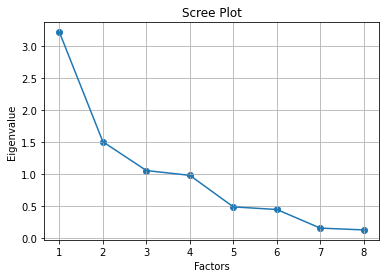

In [30]:
# Create scree plot to identify the optimal number of factors

plt.scatter(range(1,df_fact_stdnt.shape[1]+1),ev)
plt.plot(range(1,df_fact_stdnt.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In the scree plot above (based on eigen values), the elbow (point that first slowing down the bending) indicates the optimal number of actors, which is at 3.  In other words, the optimal number of factors is 3.

In [31]:
# Create a dataframe to see where (factors) variables belong to. 

df_loads_stdnt = pd.DataFrame(fa_stdnt.loadings_, columns=['Factor1', 'Factor2', 'Factor3'], index=[df_fact_stdnt.columns])

In [32]:
print(df_loads_stdnt)


                            Factor1   Factor2   Factor3
patient_age               -0.020538 -0.056649 -0.061037
education_bachelors        0.929751 -0.230292  0.148380
income_individual_median   0.715161 -0.407003  0.344755
home_value                 0.587447 -0.069778  0.649344
commute_time               0.061464 -0.006385  0.615847
health_uninsured          -0.099329  0.620336 -0.177404
widowed                   -0.667444 -0.042975 -0.033452
education_less_highschool -0.262681  0.905639  0.350776


The dataframe of factor loadings tells us the 'best home' each feature belongs to.  The general rule of thumb for the cut off is between the absolute value of 0.3 or 0.4.  Meanwhile, the loadings show the direction and strength of the influence of a factor on a variable.  The representation above makes it a little difficult to read.  So let's try a different way.

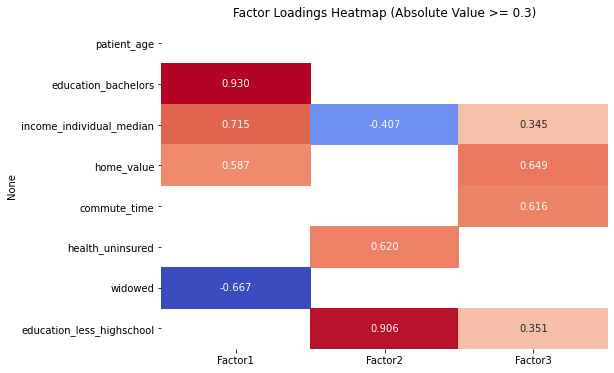

In [33]:
# Create a mask for values with absolute value >= 0.3
mask = abs(df_loads_stdnt) >= 0.3

# Create a heatmap with color-coding for factor loadings
plt.figure(figsize=(8, 6))
sns.heatmap(df_loads_stdnt, annot=True, cmap="coolwarm", fmt=".3f", mask=~mask, cbar=False)
plt.title('Factor Loadings Heatmap (Absolute Value >= 0.3)')
plt.show()


<b>Full Version</b>

In [34]:
# Exclude the target

df_fact = df_num.drop('DiagPeriodL90D', axis=1)

df_fact.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12906 entries, 0 to 12905
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   patient_age                12906 non-null  int64  
 1   education_bachelors        12905 non-null  float64
 2   income_individual_median   12905 non-null  float64
 3   home_value                 12902 non-null  float64
 4   commute_time               12905 non-null  float64
 5   health_uninsured           12905 non-null  float64
 6   widowed                    12905 non-null  float64
 7   education_less_highschool  12905 non-null  float64
 8   bmi                        3941 non-null   float64
 9   race_white                 12905 non-null  float64
 10  race_black                 12905 non-null  float64
 11  race_asian                 12905 non-null  float64
 12  race_native                12905 non-null  float64
 13  hispanic                   12905 non-null  flo

In [35]:
df_fact.shape

(12906, 22)

In [36]:
# Instantiate factor analysis object

fa = FactorAnalyzer(rotation='varimax')
fa.fit(df_fact)

FactorAnalyzer(rotation='varimax', rotation_kwargs={})

In [37]:
# Check Eigenvalues, which are the amount of variance of a variable explained by each factor

ev, v = fa.get_eigenvalues()
ev

array([6.52153974, 4.59286295, 1.8439246 , 1.39828418, 1.26616095,
       1.0329345 , 0.9590988 , 0.87838381, 0.69432971, 0.5849218 ,
       0.50173221, 0.34388414, 0.29158235, 0.26479466, 0.20645735,
       0.1960117 , 0.134508  , 0.10291182, 0.07610158, 0.06278828,
       0.03784082, 0.00894605])

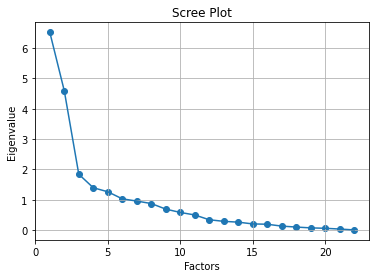

In [38]:
# Create scree plot to identify the optimal number of factors

plt.scatter(range(1,df_fact.shape[1]+1),ev)
plt.plot(range(1,df_fact.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In the scree plot above (based on eigen values), the elbow (point that first slowing down the bending) indicates the optimal number of actors, which is at 3.  In other words, the optimal number of factors is 3.

In [39]:
# Create a dataframe to see where (factors) variables belong to. 

df_loads = pd.DataFrame(fa.loadings_, columns=['Factor1', 'Factor2', 'Factor3'], index=[df_fact.columns])

In [40]:
print(df_loads)

                            Factor1   Factor2   Factor3
patient_age               -0.030065 -0.010393 -0.055292
education_bachelors        0.892480 -0.022824 -0.214297
income_individual_median   0.842359 -0.300007 -0.219609
home_value                 0.834478  0.007766  0.278288
commute_time               0.347772  0.084691  0.222991
health_uninsured          -0.241906  0.266924  0.340784
widowed                   -0.618997 -0.093347  0.026793
education_less_highschool -0.214500  0.492719  0.740777
bmi                       -0.052354  0.027367 -0.006104
race_white                -0.463876 -0.774928 -0.244973
race_black                -0.026528  0.843340 -0.342505
race_asian                 0.731867  0.103286  0.241230
race_native               -0.116553 -0.003373  0.162849
hispanic                   0.287569  0.238515  0.765217
labor_force_participation  0.680338 -0.058438 -0.257688
rent_median                0.909658 -0.010210  0.233477
self_employed              0.616170  0.184708  0

The dataframe of factor loadings tells us the 'best home' each feature belongs to.  The general rule of thumb for the cut off is between the absolute value of 0.3 or 0.4.  Meanwhile, the loadings show the direction and strength of the influence of a factor on a variable.  The representation above makes it a little difficult to read.  So let's try a different way.

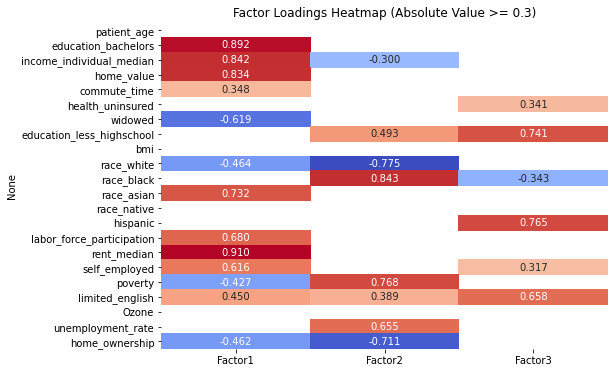

In [41]:
# Create a mask for values with absolute value >= 0.3
mask = abs(df_loads) >= 0.3

# Create a heatmap with color-coding for factor loadings
plt.figure(figsize=(8, 6))
sns.heatmap(df_loads, annot=True, cmap="coolwarm", fmt=".3f", mask=~mask, cbar=False)
plt.title('Factor Loadings Heatmap (Absolute Value >= 0.3)')
plt.show()

Based on the rule of thumb (i.e. Absolute value of 3 or 4), a feature can belong to more than 1 factor.  For instance, <i>poverty</i> with the absolute loading of 0.427 and 0.768, both Factor 1 and Factor 2 can be its home.  From a statistical standpoint, one can base the decision on the largest absolute value.  In other words, it's features with the darker red (positive) or the darker blue (negative) colors.  Looking at <i>poverty </i>, we can say it is Factor 2 is its home.  Meanwhle, we also might want to consider our decision from a reality/business/common sense angle.  That's when we might need to consult with a subject matter expert (SME).

In [42]:
# Save pickle df for easy retrieval later

df_temp.to_pickle(r'/path/file.pkl')